In [1]:
from trainer import *

with open('configs/test_config.yaml') as file:
    config = yaml.full_load(file)
 
trainer = Trainer(config)

Saving checkpoint..
Initializing samples..


In [2]:
dataset = trainer.dataset
sample = dataset.__getitem__(100)

In [3]:
poses =  sample['oxts']
poses = [pose.unsqueeze(0) for pose in poses]
poses

[tensor([[-0.0699,  0.0103,  0.2686,  1.0698, -0.0028,  0.0012]],
        dtype=torch.float64),
 tensor([[-0.0686,  0.0118,  0.2683, -1.0760, -0.0061,  0.0017]],
        dtype=torch.float64)]

In [4]:
list(sample)

['tgt', 'ref_imgs', 'intrinsics', 'oxts', 'groundtruth']

# Understanding the Inverse Warp

In [5]:
from copy import deepcopy
from utils.transforms import UnNormalize

unnormalize = UnNormalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

target   = deepcopy(unnormalize(sample['tgt']))
ref_imgs = [deepcopy(unnormalize(ref)) for ref in sample['ref_imgs']]
depth    = deepcopy(sample['groundtruth'])
intrinsics = deepcopy(sample['intrinsics'])

In [6]:
img_plot  = np.transpose(target.squeeze().cpu().detach().numpy(), (1, 2, 0))
refs_plot = [np.transpose(img.squeeze().cpu().detach().numpy(), (1, 2, 0)) for img in ref_imgs]

Text(0.5, 1.0, 'gt')

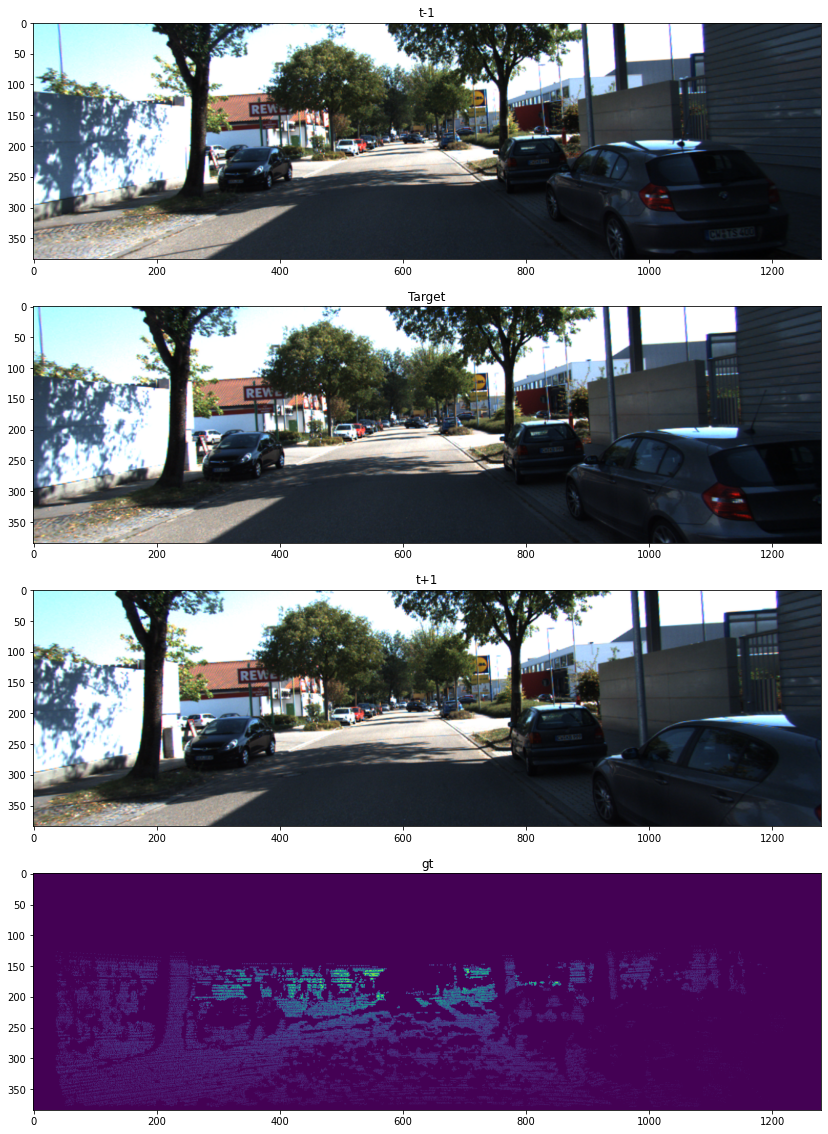

In [7]:
fig, axs = plt.subplots(4, figsize=(20, 20))
axs[0].imshow(refs_plot[0])
axs[0].set_title('t-1')
axs[1].imshow(img_plot)
axs[1].set_title('Target')
axs[2].imshow(refs_plot[1])
axs[2].set_title('t+1')
axs[3].imshow(depth)
axs[3].set_title('gt')

In [8]:
from geometry.pose_geometry import inverse_warp, disp_to_depth

In [9]:
poses[0]

tensor([[-0.0699,  0.0103,  0.2686,  1.0698, -0.0028,  0.0012]],
       dtype=torch.float64)

In [10]:
# projected_imgs = [inverse_warp(ref_img.unsqueeze(0), depth.unsqueeze(0), pose, intrinsics, warp_test=True) for ref_img, pose in zip(ref_imgs, poses)]

In [11]:
# torch.mean(torch.abs(target - projected_imgs[1]))

## Pose plot

In [12]:
import plotly.graph_objects as go

In [19]:
x = []
y = []
z = []
for indx in range(len(dataset)):
    sample = dataset.__getitem__(indx)
    pose_0_t =  np.array(sample['oxts'][0][3:])
    
    x.append(pose_0_t[0])
    y.append(pose_0_t[1])
    z.append(pose_0_t[2])
    
#     pose_1_t =  np.array(sample['oxts'][0][3:])
    
    

KeyboardInterrupt: 

In [23]:
fig = go.Figure(data=go.Scatter(
    x = x,
    y = y,
    mode='markers',
    marker=dict(
        size=3,
        color=z, #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.show()


In [25]:
10 m/s

10.0